In [1]:
cd /home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src

/home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src


In [2]:
import os
import sys

sys.path.insert(0, os.path.abspath("./post_processing/local_calculations"))
sys.path.insert(0, os.path.abspath("./helper_functions/cloud"))
sys.path.insert(0, os.path.abspath("./file_manager"))
sys.path.insert(0, os.path.abspath("./hamiltonian"))
sys.path.insert(0, os.path.abspath("./correlation"))
sys.path.insert(0, os.path.abspath("./single_and_double_excitations_subspace"))

In [3]:
from qutip import *
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from hamiltonian.hamiltonian_builder import *


from helper_functions.operators import *
from helper_functions.cloud import *
from file_manager.visualization_preparation_tools import *
from correlation.second_order_correlation  import *
from single_and_double_excitations_subspace.parameter_generator_for_ODE import *
from single_and_double_excitations_subspace.atomic_contributions_ODE import *
from single_and_double_excitations_subspace.QRT_dynamics_ODE import *

from post_processing.local_calculations import *
from helper_functions.cloud import *
from helper_functions.operators import *
from helper_functions.other import * 

In [4]:
ind = 24
position_1_path = f"./benchmarking/N6_Omega0.05_Delta0.0_b0_0.1_S_Int_On_testeODE_t01_direct//positions/positions_N6_Omega0.05_Delta0.0_run{ind}.dat"
rho_1_path = f"./benchmarking/N6_Omega0.05_Delta0.0_b0_0.1_S_Int_On_testeODE_t01_direct//N6_Omega0.05_Delta0.0_run{ind}.npy"

In [5]:
#r =  get_positions_from_a_file(position_1_path)
#Hdims = [[2 for i in range(len(r))], [2 for i in range(len(r))]]
#rho = Qobj(file_data_read(rho_1_path), dims=Hdims)

In [6]:
N = 5
N_atoms = N

b0 = 0.1

r = random_cloud(0, N, exc_radius = None, b0 = b0)

### Subspace solutions

In [7]:
R1 = get_nhat_from_angle(25)
R2 = get_nhat_from_angle(205)

tf = 5
Omega = 0.5
Delta = 20
t_span, dt = np.linspace(0,tf,300, retstep = True) 

QRT:

In [8]:
Delta1D, Omega1D, Gamma2D, Delta2D  = GetAllODEParametersGiven_r(Omega, Delta, r, beam = "gaussian", scalar = True)
Beta1D, Beta2D, t_span, r = SolveForBeta1DandBeta2D_tau_QRT(N, kd = None , b0 = None, exc_radius = None, Delta = Delta , Omega = Omega, wave_mixing = True, scalar = True, interaction = True, r = r, taulist=t_span)  


Exact:

In [9]:
taulist = t_span 

S_H, S_c_ops, GTensor,M, GammaSR, DeltaSR, Omega, SR_state, r = system_spec_N(1, N_atoms, kd = None, b0 = b0, exc_radius = None , Delta = Delta, Omega = Omega, wave_mixing = True, scalar = True, r = r, beam = "plane_wave")
rho_ss_S, total_time_ss = get_steadystate(S_H, 0, r,  b0, S_c_ops, N, faseglobal = 1, rho_ss = None, rho_ss_parameter = "direct", tmax = None)


g2_ls, rho_ss, total_time_ss, total_time_correlation = g2_l(S_H, 0, r, R1, R2, taulist, S_c_ops, N, faseglobal = 1, rho_ss = rho_ss_S, rho_ss_parameter = "direct", tmax = None)
sigma_ij = np.zeros([N,N], dtype="object")


for i in range(len(sigma_ij[0])):
    for j in range(len(sigma_ij[0])):
        sigma_ij[i][j] = (correlation_2op_1t(S_H, rho_ss, taulist, S_c_ops, sigmam_i(N,i), sigmam_i(N,j), solver='me', reverse=True))

b0 system 0.1
kd system None
r is an array


Plotting

/home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src/file_manager/visualization_preparation_tools.py:342: ComplexWarning: Casting complex values to real discards the imaginary part
  z_column[z] = matrix[z][i][j]
/home/roberto/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src/file_manager/visualization_preparation_tools.py:342: ComplexWarning: Casting complex values to real discards the imaginary part
  z_column[z] = matrix[z][i][j]
/home/roberto/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src/file_manager/visualization_preparation_tools.py:342: ComplexWarning: Casting 

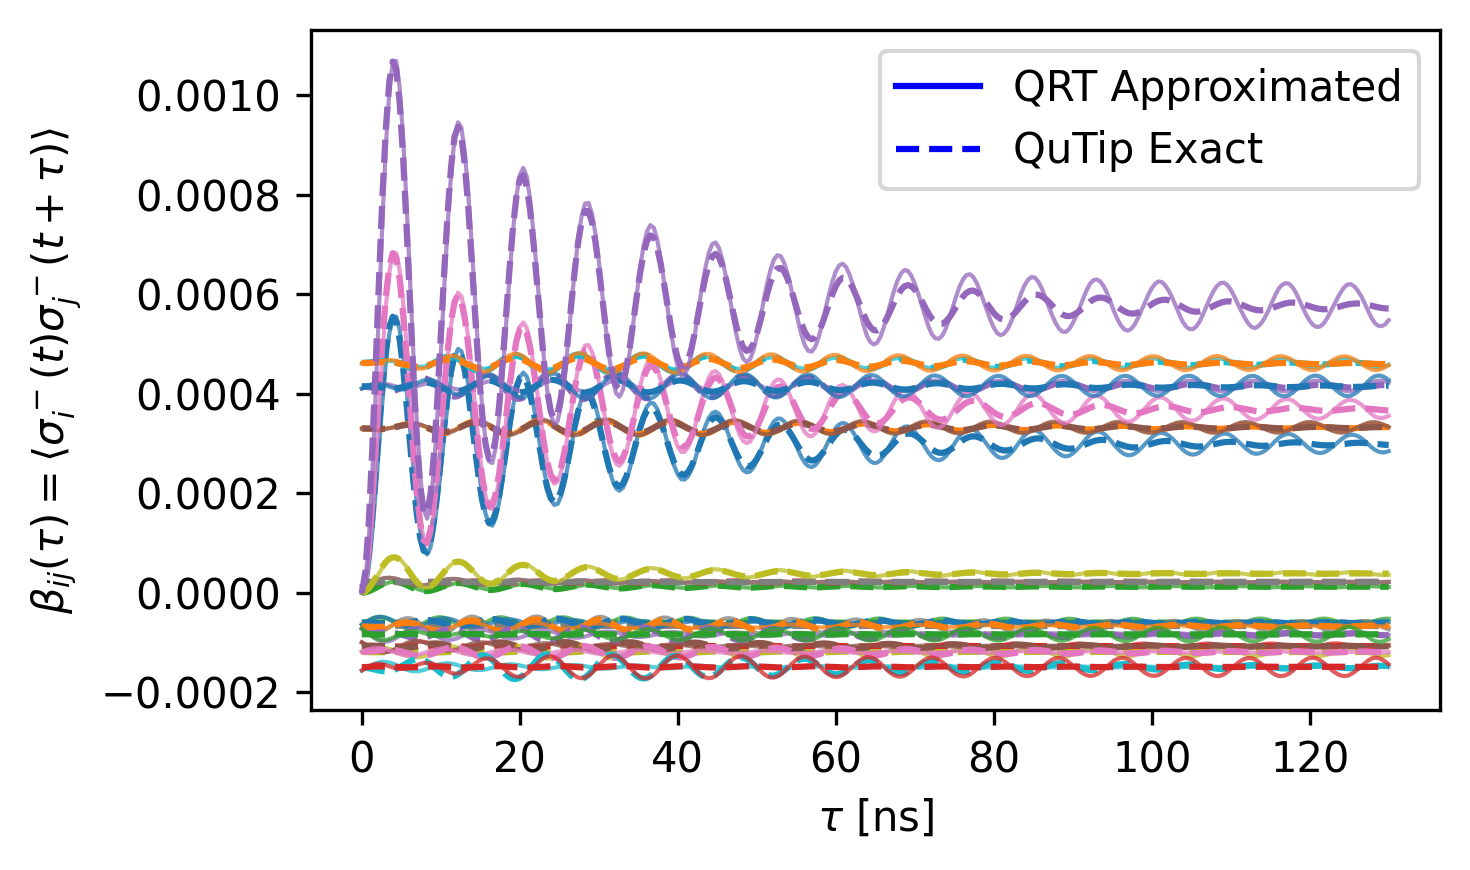

In [10]:
fig = plt.figure(figsize=(5, 3), dpi=300)
for i in range(len(r)):
    for j in range(len(r)):
        beta_plot = plt.plot(t_span*26, column(np.real(Beta2D), i, True, j),  linewidth = 1,  alpha = 0.75)
        color = beta_plot[0].get_color()
        sigma_scatter = plt.plot(t_span*26, sigma_ij[i][j], "--", color = color)

approximated_label = mlines.Line2D([], [], color='blue', marker='',
                          markersize=10, label='QRT Approximated')
exact_label = mlines.Line2D([], [], color='blue',
                          markersize=15, linestyle = "--",label='QuTip Exact')

plt.legend(handles=[approximated_label,exact_label])#, bbox_to_anchor=(0.43,-0.15))

#plt.title(f"N = {N}, b0 = {b0}, Omega = {Omega}, Delta = {Delta}  ")
plt.xlabel(r"$\tau$ [ns]")

plt.ylabel(r"$ \beta_{ij}(\tau) =  \langle \sigma^-_i(t ) \sigma^-_j(t + \tau) \rangle $")

plt.tight_layout()
plt.savefig("betaij_tau_present.png", dpi = 300, )

Second correlation

In [11]:
g2_ls, rho_ss, total_time_ss, total_time_correlation = g2_l(S_H, 0, r, R1, R2, taulist, S_c_ops, N, faseglobal = 1, rho_ss = rho_ss_S, rho_ss_parameter = "direct", tmax = None)

In [12]:
g2_list = np.zeros_like(t_span)
for t in range(len(t_span)):
        g2_list[t] = np.real(g2_of_zero_subspace_approach(r, R1, R2, Beta1D[t], Beta2D[t]))

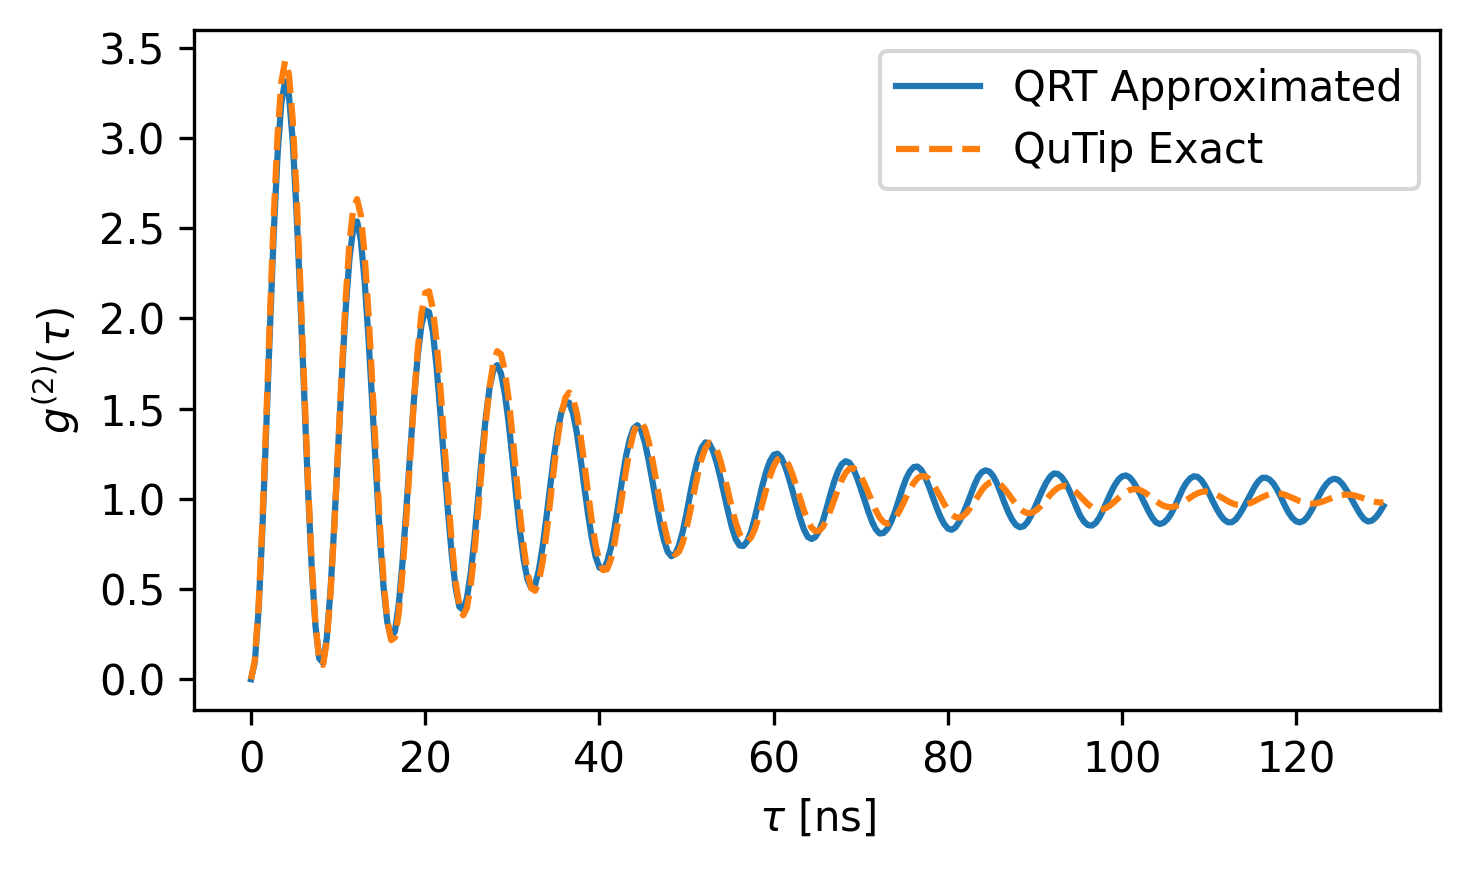

In [13]:
fig = plt.figure(figsize=(5, 3), dpi=300)
#plt.ylim(-0.2,14)
plt.plot(t_span*26, g2_list, label = 'QRT Approximated')
plt.plot(t_span*26, g2_ls, "--", label = "QuTip Exact")
#plt.title(f"N = {N}, b0 = {b0}, Omega = {Omega}, Delta = {Delta}  ")

plt.xlabel(r"$\tau$ [ns]")
plt.ylabel(r"$ g^{(2)}(\tau)  $")
plt.legend()
plt.tight_layout()

plt.savefig("g2_tau_present.png", dpi = 300)